# Tugas Data Mining


## Dissimilarity (TUGAS 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/car_data.csv"
data = pd.read_csv(url)

In [ ]:
data.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [ ]:
# Show dataset shape
number_of_columns = data.shape[1]
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
# Show all columns from dataframe
data.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

### Categorical/Nominal






*   Gender
*   Purchased

In [ ]:
data[["Gender", "Purchased"]].head(5)

,Gender,Purchased
0,Male,0
1,Male,0
2,Male,0
3,Male,1
4,Male,0


### Change Values to 1/0


Take all values of ‘Gender’ series

*   If values is "Male" change to 1
*   If values is "Female" change to 0







In [ ]:
# Gender code
gender_for_male = "Male"
gender_for_female = "Female"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_gender_to_biner(gender):
    return value_of_one if gender == gender_for_male else value_of_zero

In [ ]:
# update semua data pada kolom Area Type
data["Gender"] = data["Gender"].apply(change_code_gender_to_biner)

In [ ]:
data[["Gender", "Purchased"]].head(5)

,Gender,Purchased
0,1,0
1,1,0
2,1,0
3,1,1
4,1,0


In [ ]:
# Variable yang konstan
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [ ]:
def get_dissimilarity_data(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataa = pd.concat([first_series,second_series],axis=1)
    return dataa.T

In [ ]:
get_dissimilarity_data(data, [1,2], ["Gender", "Purchased"]).T

,1,2
Gender,1,1
Purchased,0,0


In [ ]:
data.loc[0:5, ["Gender", "Purchased"]]

,Gender,Purchased
0,1,0
1,1,0
...,...,...
4,1,0
5,0,1


In [ ]:
def count_contingency_value(data, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = data.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
data_1_2 = get_dissimilarity_data(data, [1,2], ["Gender", "Purchased"])

In [ ]:
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)

In [ ]:
# d(1,3)
data_1_3 = get_dissimilarity_data(data, [1,3], ["Gender", "Purchased"])

In [ ]:
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)

In [ ]:
# d(1,4)
data_1_4 = get_dissimilarity_data(data, [1,4], ["Gender", "Purchased"])

In [ ]:
c_data_1_4 = count_contingency_value(data_1_4, 1, 4)

In [ ]:
# d(1,5)
data_1_5 = get_dissimilarity_data(data, [1,5], ["Gender", "Purchased"])

In [ ]:
c_data_1_5 = count_contingency_value(data_1_5, 1, 5)

### Dissimilarity Binary Assymetric Value Formula


$$ \frac {p + r}{q + r + s} $$


In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)

In [ ]:
d_1_2

0.0

In [ ]:
d_1_3

0.0

In [ ]:
d_1_4

0.0

## Diskritisasi (TUGAS 2)




1. Carilah data yang bertipe numerik ( data klassifikasi)
2. Lakukan proses diskritisasi dengan *equal width* dan *equal frequency*
3. Lakukan proses diskritisasi dengan basis *entropy*
4. Kumpulkan tugas dengan link github ( web statis dari jupyter book)

### Cari data




sumber
[Data Bunga Iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)

In [ ]:
import pandas as pd

In [ ]:
# source data
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [ ]:
# Create dataframe
df = pd.read_csv(dataset_url)

In [ ]:
# show first 15 rows
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
# CONSTAN SERIES

SEPAL_LENGTH_SERIES = df["sepal.length"]
SEPAL_WIDTH_SERIES = df["sepal.width"]
PETAL_LENGTH_SERIES = df["petal.length"]
PETAL_WIDTH_SERIES = df["petal.width"]

# Class Variety Name 
IRIS_VARIETY = df["variety"]

### Hitung Data


### Definisi *discretization*



1. Proses mengubah data bertipe data *numeric* menjadi data bertipe *categorical*
2. Diskritisasi memiliki 2 pendekatan yaitu *equal-width intervals* dan *equal-frequency intervals*
3. *equal-width intervals* adalah diskritisasi dengan lebar data yang sama
4. *equal-frequency intervals* adalah diskritisasi dengan jumlah data yang sama

##### Cut


* Cut adalah sebuah *method* pada library *pandas* untuk melakukan perhitungan *equal width frequency intervals*


```
# Syntax
pd.cut(series, interval, right=True, label)
```


##### Sepal Width



* Equal Width Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
df_sepal_width_ew = pd.DataFrame(pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_sepal_width_ew.columns = ["sepal.width", "category", "variety"]

In [ ]:
df_sepal_width_ew

,sepal.width,category,variety
0,3.5,lebar,Setosa
1,3.0,lebar,Setosa
2,3.2,lebar,Setosa
3,3.1,lebar,Setosa
4,3.6,lebar,Setosa
...,...,...,...
145,3.0,lebar,Virginica
146,2.5,sedikit_lebar,Virginica
147,3.0,lebar,Virginica
148,3.4,lebar,Virginica


In [ ]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

lebar            88
sedikit_lebar    47
sangat_lebar     15
Name: sepal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

##### Petal Width

* Equal Width Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
df_petal_width = pd.DataFrame(pd.concat((PETAL_WIDTH_SERIES, petal_width_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_petal_width.columns = ["petal.width", "category", "variety"]

In [ ]:
df_petal_width

,petal.width,category,variety
0,0.2,sedikit_lebar,Setosa
1,0.2,sedikit_lebar,Setosa
2,0.2,sedikit_lebar,Setosa
3,0.2,sedikit_lebar,Setosa
4,0.2,sedikit_lebar,Setosa
...,...,...,...
145,2.3,sangat_lebar,Virginica
146,1.9,sangat_lebar,Virginica
147,2.0,sangat_lebar,Virginica
148,2.3,sangat_lebar,Virginica


In [ ]:
# equal-width intervals with label
labelled_petal_width_ew_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

##### Sepal Length

* Equal Width Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
df_sepal_length_ew = pd.DataFrame(pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_sepal_length_ew.columns = ["sepal_length", "category", "variety"]

In [ ]:
df_sepal_length_ew

,sepal_length,category,variety
0,5.1,sedikit_lebar,Setosa
1,4.9,sedikit_lebar,Setosa
2,4.7,sedikit_lebar,Setosa
3,4.6,sedikit_lebar,Setosa
4,5.0,sedikit_lebar,Setosa
...,...,...,...
145,6.7,lebar,Virginica
146,6.3,lebar,Virginica
147,6.5,lebar,Virginica
148,6.2,lebar,Virginica


In [ ]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

lebar            71
sedikit_lebar    59
sangat_lebar     20
Name: sepal.length, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

##### Petal Length

* Equal Width Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
df_petal_length_ew =  pd.DataFrame(pd.concat((PETAL_LENGTH_SERIES,petal_length_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_petal_length_ew.columns = ["petal_length", "category", "variety"]

In [ ]:
df_petal_length_ew

,petal_length,category,variety
0,1.4,sedikit_lebar,Setosa
1,1.4,sedikit_lebar,Setosa
2,1.3,sedikit_lebar,Setosa
3,1.5,sedikit_lebar,Setosa
4,1.4,sedikit_lebar,Setosa
...,...,...,...
145,5.2,sangat_lebar,Virginica
146,5.0,sangat_lebar,Virginica
147,5.2,sangat_lebar,Virginica
148,5.4,sangat_lebar,Virginica


In [ ]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

##### Qcut
* Qcut adalah sebuah *method* pada library *pandas* untuk melakukan perhitungan *equal frequency intervals*

```
# Syntax
pd.qcut(series, interval, label)
```

##### Sepal Width

* Equal Frequency Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
df_sepal_width_ef = pd.DataFrame(pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ef_binning, IRIS_VARIETY), axis = 1))

In [ ]:
# change columns name
df_sepal_width_ef.columns = ["sepal_width", "category", "variety"]

In [ ]:
df_sepal_width_ef

,sepal_width,category,variety
0,3.5,sangat_lebar,Setosa
1,3.0,lebar,Setosa
2,3.2,lebar,Setosa
3,3.1,lebar,Setosa
4,3.6,sangat_lebar,Setosa
...,...,...,...
145,3.0,lebar,Virginica
146,2.5,sedikit_lebar,Virginica
147,3.0,lebar,Virginica
148,3.4,sangat_lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

sedikit_lebar    57
lebar            50
sangat_lebar     43
Name: sepal.width, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

##### Petal Width

* Equal Frequency Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-width and petal category
df_petal_width_ef = pd.DataFrame(pd.concat((PETAL_WIDTH_SERIES, petal_width_ef_binning, IRIS_VARIETY), axis = 1))

In [ ]:
# change columns name
df_petal_width_ef.columns = ["petal_width", "category", "variety"]

In [ ]:
df_petal_width_ef

,petal_width,category,variety
0,0.2,sedikit_lebar,Setosa
1,0.2,sedikit_lebar,Setosa
2,0.2,sedikit_lebar,Setosa
3,0.2,sedikit_lebar,Setosa
4,0.2,sedikit_lebar,Setosa
...,...,...,...
145,2.3,sangat_lebar,Virginica
146,1.9,sangat_lebar,Virginica
147,2.0,sangat_lebar,Virginica
148,2.3,sangat_lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

lebar            52
sedikit_lebar    50
sangat_lebar     48
Name: petal.width, dtype: int64

In [ ]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

##### Sepal Length

* Equal Frequency Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-length and sepal category
df_sepal_length_ef = pd.DataFrame(pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ef_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_sepal_length_ef.columns = ["sepal_length", "category", "variety"]

In [ ]:
df_sepal_length_ef

,sepal_length,category,variety
0,5.1,sedikit_lebar,Setosa
1,4.9,sedikit_lebar,Setosa
2,4.7,sedikit_lebar,Setosa
3,4.6,sedikit_lebar,Setosa
4,5.0,sedikit_lebar,Setosa
...,...,...,...
145,6.7,sangat_lebar,Virginica
146,6.3,lebar,Virginica
147,6.5,sangat_lebar,Virginica
148,6.2,lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

lebar            56
sedikit_lebar    52
sangat_lebar     42
Name: sepal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

##### Petal Length

* Equal Frequency Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-length and petal category
df_petal_length_ef = pd.DataFrame(pd.concat((PETAL_LENGTH_SERIES, petal_length_ef_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_petal_length_ef.columns = ["petal_length", "category", "variety"]

In [ ]:
df_petal_length_ef

,petal_length,category,variety
0,1.4,sedikit_lebar,Setosa
1,1.4,sedikit_lebar,Setosa
2,1.3,sedikit_lebar,Setosa
3,1.5,sedikit_lebar,Setosa
4,1.4,sedikit_lebar,Setosa
...,...,...,...
145,5.2,sangat_lebar,Virginica
146,5.0,sangat_lebar,Virginica
147,5.2,sangat_lebar,Virginica
148,5.4,sangat_lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: petal.length, dtype: int64

### Definisi Entropy-based Binning



1.   Metode untuk mengelompokkan data *numeric* menjadi *categorical*
2.   Pengelompokkan dengan mencari jumlah pembagi yang terabaik
3.   Hasil pengelompokkan terbaik adalah dengan *entropy gain* yang paling besar


*  Rumus Entropy

$$
\begin{align*}
\displaystyle Entropy(S) &= \sum_{i=0}^{k} -pi \ log_{2} \ pi \\
\end{align*}
$$



#### Persiapan


*   Impor modul log2 dari *package math*
*   Ambil data yang akan digunakan


```
# dataframe about petal width (Equeal Frequency Interval)
df_petal_width_ef
```

*  Tentukan label


```
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
```



In [ ]:
# module to calculate log
from math import log2

In [ ]:
# dataframe
target_data = df_petal_width_ef
target_data

,petal_width,category,variety
0,0.2,sedikit_lebar,Setosa
1,0.2,sedikit_lebar,Setosa
2,0.2,sedikit_lebar,Setosa
3,0.2,sedikit_lebar,Setosa
4,0.2,sedikit_lebar,Setosa
...,...,...,...
145,2.3,sangat_lebar,Virginica
146,1.9,sangat_lebar,Virginica
147,2.0,sangat_lebar,Virginica
148,2.3,sangat_lebar,Virginica


In [ ]:
# category label
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]

##### Functions

###### Fungsi menghitung banyaknya data setiap kategori

In [ ]:
# count every value based the given category
def countEveryCategory(data_column, labels, column, category):
    group = data_column.groupby(category).count()
    amount_of_every_category = []
    for label in labels:
        amount_of_every_category.append(group.loc[label, column])
    return amount_of_every_category

###### Fungsi menghitung banyaknya data setiap kategori berdasarkan nilai pembagi atau *split value* yang diberikan

In [ ]:
# split the given data based on category and split value 
def split(split_value, data_column, labels, col, category):
    less_group = data_column[data_column[col] < split_value]
    greater_group = data_column[data_column[col] >= split_value]
    
    length_less_group = countEveryCategory(less_group, labels, col, category)
    length_greater_group = countEveryCategory(greater_group, labels, col, category)
    
    return (length_less_group, length_greater_group)

###### Fungsi menghitung perbedaan *gain* antara entropi inisial dengan entropi nilai pembagi yang diberikan




---
$$Gain(E_{new}) = (E_{initial}) \ - (E_{new})$$
---



In [ ]:
# count information gain from inisial entropy and new entropy
def count_gain(inisial_entropy, new_entropy):
  return inisial_entropy - new_entropy

###### Fungsi menghitung entropy

In [ ]:
# count entropy
def count_entropy(data_target):
    all_prob = []
    for prob in data_target:
        if (prob/sum(data_target) != 0):
            all_prob.append(prob/sum(data_target) * log2(prob/sum(data_target)))
        else:
            all_prob.append(0)
    return -(sum(all_prob))

###### Fungsi menghitung Info entropy berdasarkan nilai pembagi atau *split value* yang diberikan


---



$$ Info_A(D) = \frac{|D_1|}{|D|} Entropy (D_1)\frac{|D_2|}{|D|}+ Entropy (D_2)$$

In [ ]:
# count entropy for given a split value
def info(d, data_target):
    temp = []
    for value in d:
        temp.append((sum(value) / data_target.shape[0]) * count_entropy(value))
    return sum(temp)

###### Implementasi


*   Hitung target *entropy*
*   Hitung target *entropy* dengan *split value*
*   Hitung *entropy gain* 



In [ ]:
# entropy data target
initial_data_target_entropy = count_entropy(countEveryCategory(target_data, labels, target_data.columns[0], target_data.columns[1]))



*   **Entropy uji coba 1**
*   Nilai *split* yaitu 0.7
*   Data kurang dari $ < 0.7 $
*   Data kurang dari $ >= 0.7 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_1 = info(split(0.7, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)



*   **Entropy uji coba 2**
*   Nilai *split* yaitu $ 1.4 $
*   Data kurang dari $ < 1.4 $
*   Data kurang dari $ >= 1.4 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_2 = info(split(1.4, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)



*   **Entropy uji coba 3**
*   Nilai *split* yaitu $ 2.1 $
*   Data kurang dari $ < 2.1 $
*   Data kurang dari $ >= 2.1 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_3 = info(split(2.1, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 1})$



In [ ]:
# information gain (entropy data target and entropy_data_target_1)
count_gain(initial_data_target_entropy, entropy_data_target_1)

0.9182958340544896

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 2})$

In [ ]:
# information gain (entropy data target and entropy_data_target_2)
count_gain(initial_data_target_entropy, entropy_data_target_2)

0.6536600192724277

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 3})$

In [ ]:
# information gain (entropy data target and entropy_data_target_3)
count_gain(initial_data_target_entropy, entropy_data_target_3)

0.2985203537604644

## Implementasi K-NN pada datase iris (TUGAS 3)

In [ ]:
import pandas as pd

In [ ]:
## source data
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [ ]:
# Create dataframe
df = pd.read_csv(dataset_url)

In [ ]:
# show first 15 rows
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
#check number of rows and columns in dataset
df.shape

(150, 5)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["variety"])
#check that the target variable has been removed
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#separate target values
y = df["variety"].values
#view target values
y[0:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array(['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
cv_scores mean:0.9666666666666668


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9800000000000001

# Naive Bayes Classifier (TUGAS 4)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## source data
dataset_url = "https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/Iris.csv"
data = pd.read_csv(dataset_url)

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
X=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_test.shape

(45, 4)

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
y_train.shape

(105,)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [ ]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

# K-Means Clustering (Tugas 5)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/Iris.csv"
colnames = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
x = data.values[:, 0:4]

In [ ]:
y = data.values[:, 4]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dfkelas = pd.DataFrame(label, columns = ['kelas'])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_new = pca.fit_transform(x)

In [ ]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
from sklearn.cluster import KMeans 

# Number of clusters
kmeans = KMeans =KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(x_new)
#Getting the cluster labels
prediksi = kmeans.predict(x_new)
#Centroid values
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 2.34645113,  0.27235455],
       [-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221]])

In [ ]:
x_new[:,1:2].shape

(150, 1)

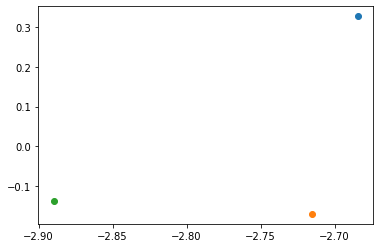

In [ ]:
from numpy import unique
from matplotlib import pyplot
from numpy import where
yhat = unique(prediksi)
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(yhat == cluster) 
  # create scatter of these samples
  pyplot.scatter(x_new[row_ix, 0], x_new[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
type(x_new[row_ix, 0])

numpy.ndarray

In [ ]:
x_new[row_ix, 0]

array([[-2.88981954]])

In [ ]:
x[row_ix, 1]

array([[3.2]], dtype=object)

In [ ]:
yhat

array([0, 1, 2], dtype=int32)

In [ ]:
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [ ]:
a = prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [ ]:
prediksi = np.array(a)
prediksi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(label, prediksi)

0.09333333333333334